### <strong>第五次作品：單變量函數的根與最小值</strong>
學號：411073088

姓名：陳敬翰
<hr>

 <font color=yellow>作品目標</font>：單變量變數的圖形，最大、最小值求法


<hr>

$\displaystyle \min_x \sqrt{\frac{x^2+1}{x+1}}$

C:\Users\asd11\AppData\Local\Temp\ipykernel_8724\815979326.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x**2 + 1) / (x + 1))


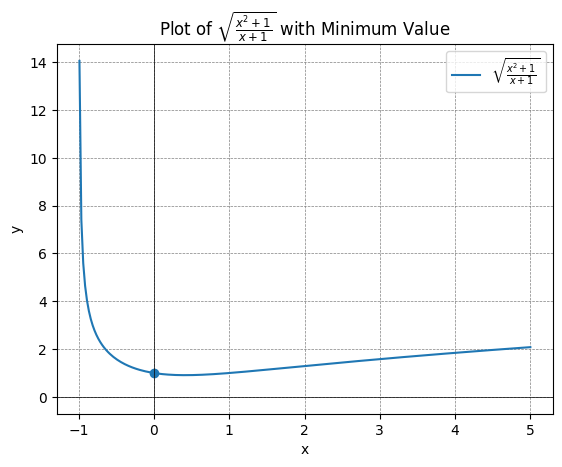

Minumn will be at x = 0 , f(x) = 1.0


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sqrt((x**2 + 1) / (x + 1))


x_values = np.linspace(-5, 5, 400)
x_values = x_values[x_values != -1]  # 避免分母為零


y_values = f(x_values)

plt.plot(x_values, y_values, label=r'$\sqrt{\frac{x^2+1}{x+1}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $\sqrt{\frac{x^2+1}{x+1}}$ with Minimum Value')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.scatter(0,f(0))
plt.show()

print(f"Minumn will be at x = 0 , f(x) = {f(0)}")


<hr>


$\displaystyle \min_{-4 \leq x \leq 3} (x+1)^5 sin(x-3)$

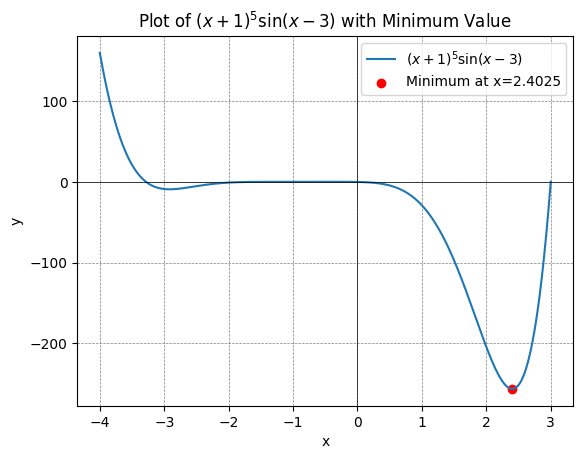

The minimum of this function will be at 2.4025 and f(2.4025) will be -256.5505


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return (x + 1)**5 * np.sin(x - 3)


x_values = np.linspace(-4, 3, 400)


y_values = f(x_values)

result = minimize_scalar(f, bounds=(-4, 3), method='bounded')

# 繪圖
plt.plot(x_values, y_values, label=r'$(x+1)^5 \sin(x-3)$')
plt.scatter(result.x, f(result.x), color='red', label=f'Minimum at x={result.x:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $(x+1)^5 \sin(x-3)$ with Minimum Value')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


print(f"The minimum of this function will be at {result.x:.4f} and f({result.x:.4f}) will be {f(result.x):.4f}")


<hr>

計算 L(x) = 10 的解 x, 其中
L(x) = $\int_a^x \sqrt{1 + (f'(t))^2}\; dt, \;\;$ for $f(t) = t^2/2$  and  $a = 0$.



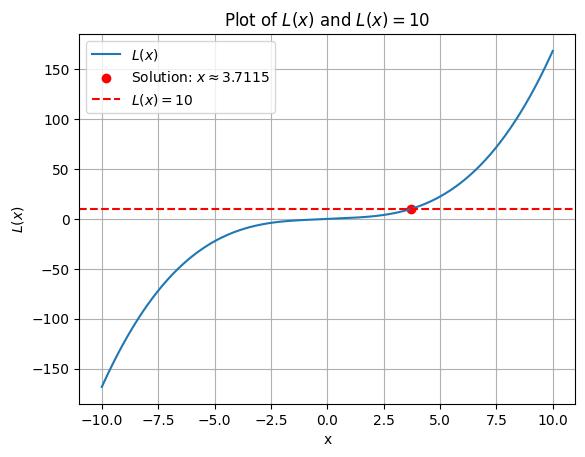

The solution x for L(x) = 10 is approximately: 3.7115


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy.optimize as opt

def L(x):
    return integrate.quad(lambda t: np.sqrt(1 + (t**2/2)**2), 0, x)[0]

vec_L = np.vectorize(L)
x_values = np.linspace(-10, 10, 1000)
y_values = vec_L(x_values)


plt.plot(x_values, y_values, label=r'$L(x)$')


solution = opt.root_scalar(lambda x: L(x) - 10, bracket=[-5, 5], method='brentq')


plt.scatter(solution.root, 10, color='red', marker='o', label=f'Solution: $x \\approx {solution.root:.4f}$')

plt.xlabel('x')
plt.ylabel('$L(x)$')
plt.title('Plot of $L(x)$ and $L(x) = 10$')
plt.axhline(10, color='red', linestyle='--', label='$L(x) = 10$')
plt.legend()
plt.grid(True)
plt.show()


print(f"The solution x for L(x) = 10 is approximately: {solution.root:.4f}")


最大概似函數估計（MLE）（離散分配）：計算 $\displaystyle \max_{p} \ln \Pi_{i=1}^N f(x_i; p)$ ,

其中 $f(x_i; p)$ 代表幾何分配的概似函數（參數 p：成功的機率， x_i：取得一次成功所需要的試驗次數），即 $f(x_i; p) = (1-p)^{x_i-1}p$。 現自幾何分配 (p=0.2) 抽取樣本 $x_i, i=1,2,\cdots$, N，且令樣本數分別為 N= 10, 20 ,30, 50, 100, 300, 500，欲採最大概似估計法(log MLE)估計 p。



C:\Users\asd11\AppData\Local\Temp\ipykernel_8724\75854603.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.log(likelihood)
c:\Users\asd11\Documents\GitHub\Statistical-Computing\myenv\Lib\site-packages\scipy\optimize\_optimize.py:2305: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
c:\Users\asd11\Documents\GitHub\Statistical-Computing\myenv\Lib\site-packages\scipy\optimize\_optimize.py:2306: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)


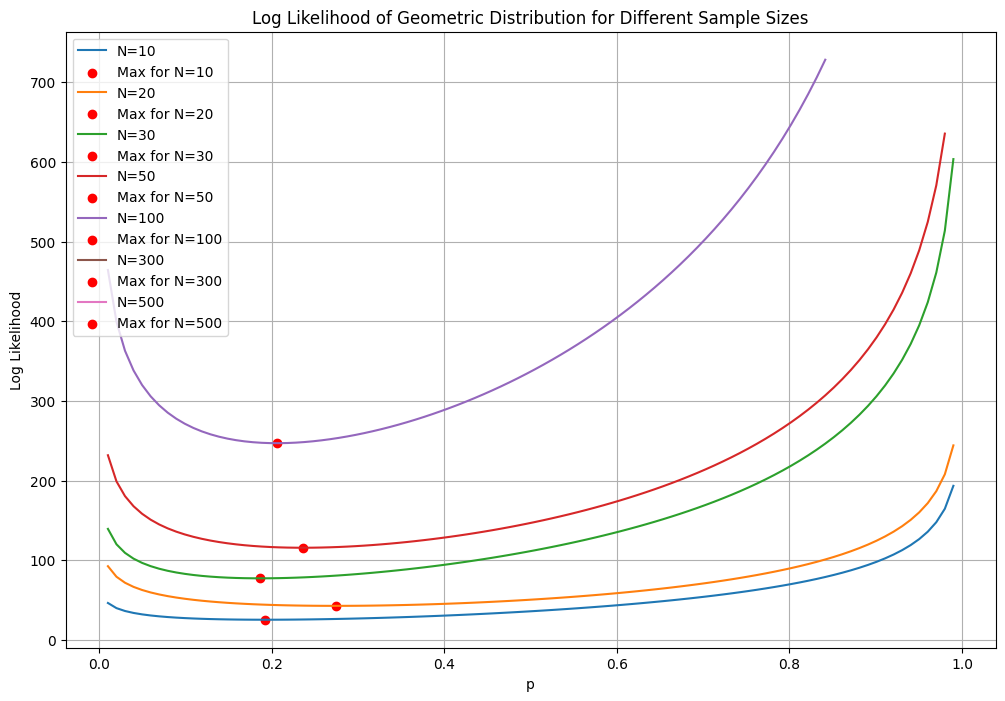

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


def geometric_distribution(x, p):
    return (1 - p)**(x - 1) * p

def log_likelihood(params, data):
    p = params
    likelihood = np.prod([geometric_distribution(x, p) for x in data])
    return -np.log(likelihood)

np.random.seed(42) 
sample_sizes = [10, 20, 30, 50, 100, 300, 500]


plt.figure(figsize=(12, 8))

for N in sample_sizes:

    data = np.random.geometric(0.2, N)
    

    log_likelihood_values = [log_likelihood(p, data) for p in np.linspace(0.01, 0.99, 100)]
    

    plt.plot(np.linspace(0.01, 0.99, 100), log_likelihood_values, label=f'N={N}')


    result = minimize_scalar(log_likelihood, bounds=(0.01, 0.99), args=(data,))
    

    plt.scatter(result.x, log_likelihood(result.x, data), color='red', marker='o', label=f'Max for N={N}')

plt.xlabel('p')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood of Geometric Distribution for Different Sample Sizes')
plt.legend()
plt.grid(True)
plt.show()
